# 3. Propiedades estadísticas del lenguaje natural

## Objetivo

- Explorar propiedades estadísticas del lenguaje natural
- Observar si se cumplen propiedades como:
    - La distribución de Zipf
    - La distribución de Heap
- Observar como impacta la normalización

## Perspectivas formales

- Fueron el primer acercamiento al procesamiento del lenguaje natural. Sin embargo tienen varias **desventajas**
- Requieren **conocimiento previo de la lengua**
- Las herramientas son especificas de la lengua
- Los fenomenos que se presentan son muy amplios y dificilmente se pueden abarcar con reglas formales (muchos casos especiales)
- Las reglas tienden a ser rigidas y no admiten incertidumbre en el resultado

## Perspectiva estadística

- Puede integrar aspectos de la perspectiva formal
- Lidia mejor con la incertidumbre y es menos rigida que la perspectiva formal
- No requiere conocimiento profundo de la lengua. Se pueden obtener soluciones de forma no supervisada

### Modelos estadísticos

- Las **frecuencias** juegan un papel fundamental para hacer una descripción acertada del lenguaje
- Las frecuencias nos dan información de la **distribución de tokens**, de la cual podemos estimar probabilidades.
- Existen **leyes empíricas del lenguaje** que nos indican como se comportan las lenguas a niveles estadísticos
- A partir de estas leyes y otras reglas estadísticas podemos crear **modelos del lenguaje**; es decir, asignar probabilidades a las unidades lingüísticas

In [9]:
# Bibliotecas
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 4]
from re import sub
import numpy as np
import pandas as pd
from itertools import chain

In [2]:
mini_corpus = """Humanismo es un concepto polisémico que se aplica tanto al estudio de las letras humanas, los
estudios clásicos y la filología grecorromana como a una genérica doctrina o actitud vital que
concibe de forma integrada los valores humanos. Por otro lado, también se denomina humanis-
mo al «sistema de creencias centrado en el principio de que las necesidades de la sensibilidad
y de la inteligencia humana pueden satisfacerse sin tener que aceptar la existencia de Dios
y la predicación de las religiones», lo que se aproxima al laicismo o a posturas secularistas.
Se aplica como denominación a distintas corrientes filosóficas, aunque de forma particular,
al humanismo renacentista1 (la corriente cultural europea desarrollada de forma paralela al
Renacimiento a partir de sus orígenes en la Italia del siglo XV), caracterizado a la vez por su
vocación filológica clásica y por su antropocentrismo frente al teocentrismo medieval
"""
words = mini_corpus.replace("\n", " ").split(" ")
len(words)

146

In [4]:
words[:10]

['Humanismo',
 'es',
 'un',
 'concepto',
 'polisémico',
 'que',
 'se',
 'aplica',
 'tanto',
 'al']

In [5]:
vocabulary = Counter(words)
vocabulary.most_common(10)

[('de', 11),
 ('la', 7),
 ('al', 6),
 ('que', 5),
 ('a', 5),
 ('y', 4),
 ('se', 3),
 ('las', 3),
 ('forma', 3),
 ('aplica', 2)]

In [6]:
len(vocabulary)

101

In [7]:
def get_frequencies(vocabulary: Counter, n: int) -> list:
    return [_[1] for _ in vocabulary.most_common(n)]

def plot_frequencies(frequencies: list, title="Freq of words", log_scale=False):
    x = list(range(1, len(frequencies)+1))
    plt.plot(x, frequencies, "-v")
    plt.xlabel("Freq rank (r)")
    plt.ylabel("Freq (f)")
    if log_scale:
        plt.xscale("log")
        plt.yscale("log")
    plt.title(title)

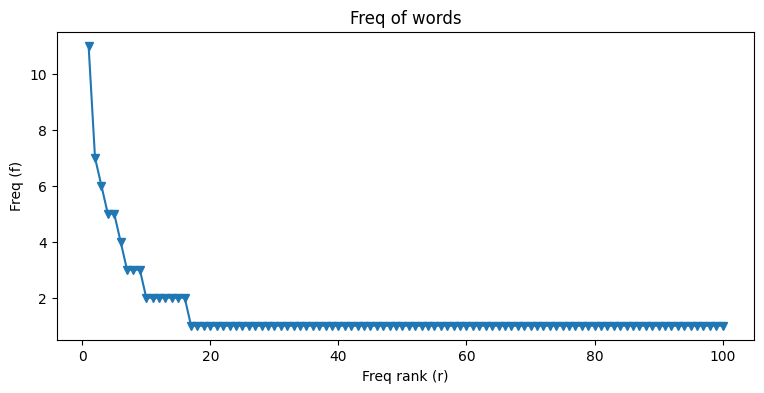

In [10]:
frequencies = get_frequencies(vocabulary, 100)
plot_frequencies(frequencies)

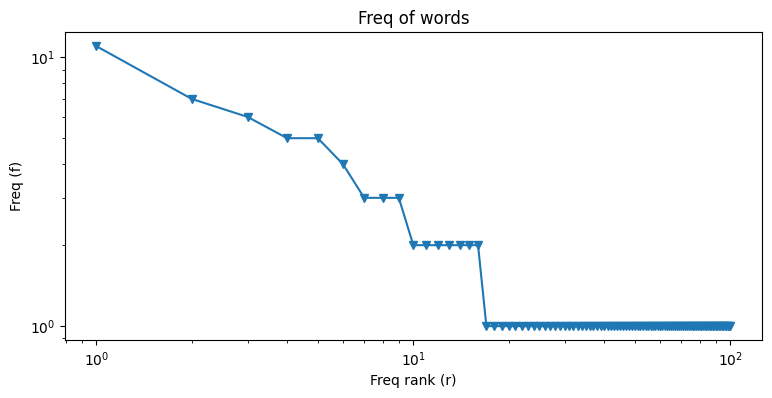

In [11]:
plot_frequencies(frequencies, log_scale=True)

### ¿Qué pasará con más datos? 📊

## Ley Zipf

Exploraremos el Corpus de Referencia del Español Actual [CREA](https://www.rae.es/banco-de-datos/crea/crea-escrito)

<center><img src="img/crea.png"></center>

In [12]:
!head corpora/zipf/crea_full.csv

words	freq
de	9999518
la	6277560
que 	4681839
el	4569652
en	4234281
y	4180279
a	3260939
los	2618657
se	2022514


In [13]:
corpus_freqs = pd.read_csv('corpora/zipf/crea_full.csv', delimiter='\t', encoding="latin-1")
#N = len(set(chain(*[list(str(w)) for w in corpus_freqs['words'].to_list()])))
corpus_freqs.head(10)

,words,freq
0,de,9999518
1,la,6277560
2,que,4681839
3,el,4569652
4,en,4234281
5,y,4180279
6,a,3260939
7,los,2618657
8,se,2022514
9,del,1857225


In [18]:
corpus_freqs.iloc[10]

words        las
freq     1686741
Name: 10, dtype: object

In [19]:
corpus_freqs[corpus_freqs["words"] == "barriga"]

,words,freq
12615,barriga,872


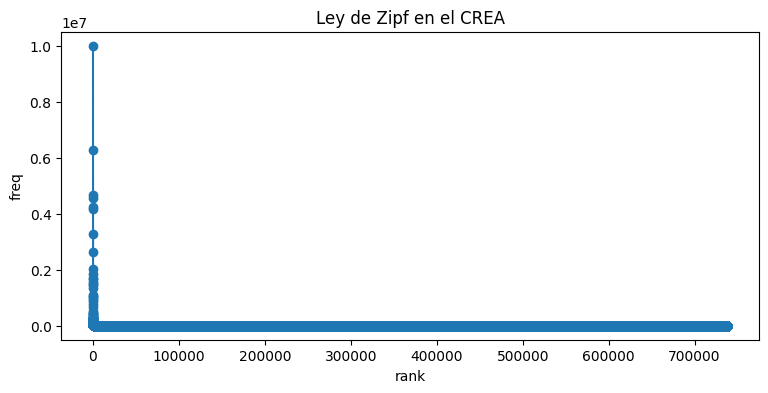

In [20]:
corpus_freqs["freq"].plot(marker="o")
plt.title('Ley de Zipf en el CREA')
plt.xlabel('rank')
plt.ylabel('freq')
plt.show()

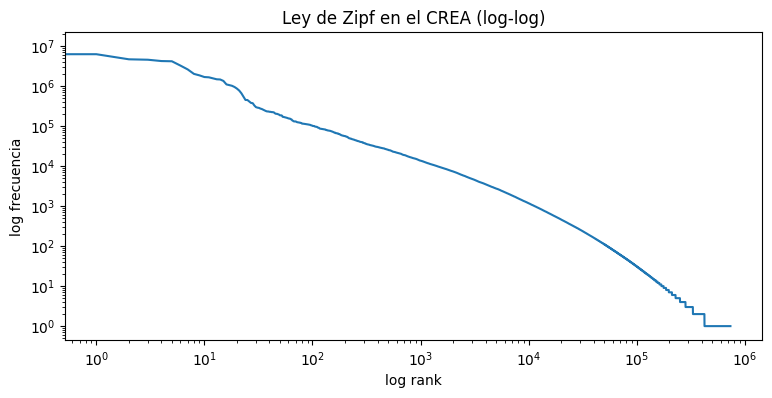

In [21]:
corpus_freqs['freq'].plot(loglog=True, legend=False)
plt.title('Ley de Zipf en el CREA (log-log)')
plt.xlabel('log rank')
plt.ylabel('log frecuencia')
plt.show()

### Ley de Zipf

- Notamos que las frecuencias entre lenguas siguen un patrón
- Pocas palabras (tipos) son muy frecuentes, mientras que la mayoría de palabras ocurren pocas veces

De hecho, la frecuencia de la palabra que ocupa la posición r en el rank, es proporcional a $\frac{1}{r}$ (La palabra más frecuente ocurrirá aproximadamente el doble de veces que la segunda palabra más frecuente en el corpus y tres veces más que la tercer palabra más frecuente del corpus, etc)

$$f(w_r) \propto \frac{1}{r^α}$$

Donde:
- $r$ es el rank que ocupa la palabra en el corpus
- $f(w_r)$ es la frecuencia de la palabra en el corpus
- $\alpha$ es un parámetro, el valor dependerá del corpus o fenómeno que estemos observando

### Formulación de la Ley de Zipf:

$f(w_{r})=\frac{c}{r^{\alpha }}$

En la escala logarítimica:

$log(f(w_{r}))=log(\frac{c}{r^{\alpha }})$

$log(f(w_{r}))=log (c)-\alpha log (r)$

### ❓ ¿Cómo estimar el parámetro $\alpha$?

In [23]:
# Ver cápitulo 12. Distribución de Zipf de Victor Mijangos
from scipy.optimize import minimize

def calculate_alpha(ranks: np.array, frecs: np.array) -> float:
    # Inicialización
    a0 = 1
    # Función de minimización:
    func = lambda a: sum((np.log(frecs)-(np.log(frecs[0])-a*np.log(ranks)))**2)
    # Minimización: Usando minimize de scipy.optimize:
    return minimize(func, a0).x[0] 

ranks = np.array(corpus_freqs.index) + 1
frecs = np.array(corpus_freqs['freq'])

a_hat = calculate_alpha(ranks, frecs)

print('alpha:', a_hat)

alpha: 1.1812227900048202


In [24]:
def plot_generate_zipf(alpha: np.float64, ranks: np.array, freqs: np.array) -> None:
    plt.plot(np.log(ranks), -a_hat*np.log(ranks) + np.log(frecs[0]), color='r', label='Aproximación Zipf')

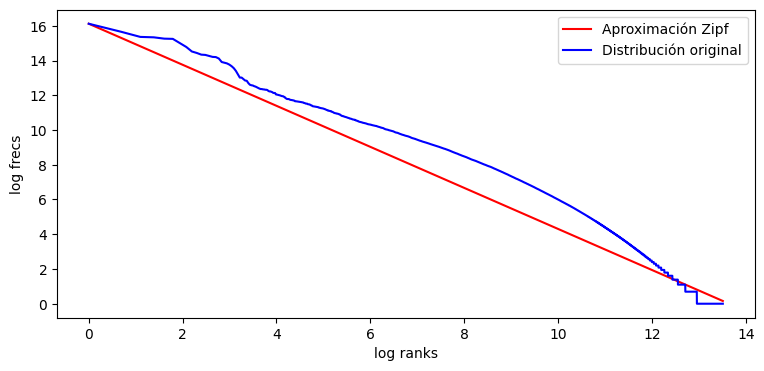

In [25]:
plot_generate_zipf(a_hat, ranks, frecs)
plt.plot(np.log(ranks), np.log(frecs), color='b', label='Distribución original')
plt.xlabel('log ranks')
plt.ylabel('log frecs')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Ley de Heap

Relación entre el número de **tokens** y **tipos** de un corpus

$$T \propto N^b$$

Dónde:

- $T = $ número de tipos
- $N = $ número de tokens
- $b = $ parámetro  

- **TOKENS**: Número total de palabras dentro del texto (incluidas repeticiones)
- **TIPOS**: Número total de palabras únicas en el texto

In [27]:
# Obtenemos los tipos y tokens
total_tokens = corpus_freqs["freq"].sum()
total_types = len(corpus_freqs)

In [28]:
total_tokens, total_types

(152558294, 737799)

In [29]:
# Ordenamos el corpus por frecuencia
corpus_freqs_sorted = corpus_freqs.sort_values(by='freq', ascending=False)

# Calculamos la frecuencia acumulada
corpus_freqs_sorted['cum_tokens'] = corpus_freqs_sorted['freq'].cumsum()

# Calculamos el número acumulado de tipos
corpus_freqs_sorted['cum_types'] = range(1, total_types + 1)

In [30]:
corpus_freqs_sorted.head()

,words,freq,cum_tokens,cum_types
0,de,9999518,9999518,1
1,la,6277560,16277078,2
2,que,4681839,20958917,3
3,el,4569652,25528569,4
4,en,4234281,29762850,5


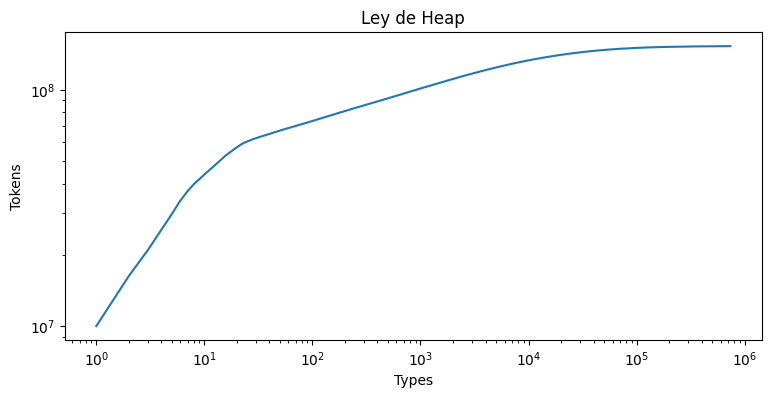

In [31]:
# Plot de la ley de Heap
plt.plot(corpus_freqs_sorted['cum_types'], corpus_freqs_sorted['cum_tokens'])
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Types')
plt.ylabel('Tokens')
plt.title('Ley de Heap')
plt.show()

## ¿Otros idiomas? 🇧🇴 🇨🇦 🇲🇽

### Presentando `pyelotl` 🌽

In [ ]:
!pip install elotl

- [Documentación](https://pypi.org/project/elotl/)
- Paquete para desarrollo de herramientas de NLP enfocado en lenguas de bajos recursos digitales habladas en México

In [32]:
from elotl import corpus as elotl_corpus


print("Name\t\tDescription")
for row in elotl_corpus.list_of_corpus():
    print(row)

Name		Description
['axolotl', 'Is a nahuatl corpus']
['tsunkua', 'Is an otomí corpus']


Cada corpus se pueden visualizar y navegar a través de interfaz web.
- [Axolotl](https://axolotl-corpus.mx/)
- [Tsunkua](https://tsunkua.elotl.mx/)

In [33]:
axolotl = elotl_corpus.load("axolotl")
for row in axolotl:
    print("Lang 1 (es) =", row[0])
    print("Lang 2 (nah) =", row[1])
    print("Variante =", row[2])
    print("Documento de origen =", row[3])
    break

Lang 1 (es) = Vino a iluminar el sol y allí fue a ver a su
Lang 2 (nah) = tlaminako tonati uan noponi kiitato
Variante = 
Documento de origen = Lo que relatan de antes (cuentos tének y nahuas de la huasteca)


In [34]:
tsunkua = elotl_corpus.load("tsunkua")
for row in tsunkua:
    print("Lang 1 (es) =", row[0])
    print("Lang 2 (oto) =", row[1])
    print("Variante =", row[2])
    print("Documento de origen =", row[3])
    break

Lang 1 (es) = Arde, se calcina su corazón y su cuerpo está doliente. De igual modo a mí me arde y se calcina mi corazón.
Lang 2 (oto) = Zo̱, da zot'i ri ndäte ne ri ngo̱k'ei yabu̱ xa ñ'u̱. Mahye̱gi nugi zo̱ ne da zät'i ma ndäte.
Variante = Otomí del Mezquital (ote)
Documento de origen = Visión de los vencidos (hñahñu)


In [35]:
def extract_words_from_sentence(sentence: str) -> list:
    return sub(r'[^\w\s\']', ' ', sentence).lower().split()

def get_words(corpus: list) -> tuple[list, list]:
    words_l1 = []
    words_l2 = []
    for row in corpus:
        words_l1.extend(extract_words_from_sentence(row[0]))
        words_l2.extend(extract_words_from_sentence(row[1]))
    return words_l1, words_l2

In [36]:
spanish_words_na, nahuatl_words = get_words(axolotl)
spanish_words_oto, otomi_words = get_words(tsunkua)

In [37]:
spanish_words_na[:10]

['vino', 'a', 'iluminar', 'el', 'sol', 'y', 'allí', 'fue', 'a', 'ver']

In [38]:
nahuatl_words[:10]

['tlaminako',
 'tonati',
 'uan',
 'noponi',
 'kiitato',
 'auh',
 'in',
 'ye',
 'yuhqui',
 'in']

### Tokens

In [39]:
print("Número total de palabras en náhuatl (corpus 1):", len(nahuatl_words))
print("Número total de palabras en español (corpus 1):", len(spanish_words_na))
print("Número total de palabras en otomí (corpus 2):", len(otomi_words))
print("Número total de palabras en español (corpus 2):", len(spanish_words_oto))

Número total de palabras en náhuatl (corpus 1): 286805
Número total de palabras en español (corpus 1): 389138
Número total de palabras en otomí (corpus 2): 68540
Número total de palabras en español (corpus 2): 56866


### ❓ ¿Porqué si son textos paralelos (traducciones) el número de palabras cambia tanto?

De manera general, por las diferencias inherentes de las lenguas para expresar los mismos conceptos, referencias, etc. De manera particular, estas diferencias revelan características morfológicas de las lenguas. El náhuatl es una lengua con tendencia aglutinante/polisintética, por lo tanto, tiene menos palabras pero con morfología rica que les permite codificar cosas que en lenguas como el Español aparecen en la sintaxis. Ejemplo:

> titamaltlakwa - Nosotros comemos tamales

### Tipos

In [40]:
nahuatl_vocabulary = Counter(nahuatl_words)
nahuatl_es_vocabulary = Counter(spanish_words_na)
otomi_vocabulary = Counter(otomi_words)
otomi_es_vocabulary = Counter(spanish_words_oto)

In [42]:
otomi_vocabulary.most_common(20)

[('ra', 5770),
 ('ya', 3861),
 ('bi', 2138),
 ('mi', 1760),
 ('ne', 1127),
 ('da', 1055),
 ('ha', 963),
 ('di', 861),
 ('ma', 763),
 ("n'a", 741),
 ('pa', 713),
 ('ge', 671),
 ('ko', 560),
 ("nu'a", 504),
 ('xki', 486),
 ('ngu', 484),
 ('ri', 480),
 ('o', 480),
 ('nuya', 431),
 ('nuna', 418)]

In [43]:
print("Tamaño del vocabulario de nahúatl:", len(nahuatl_vocabulary))
print("Tamaño del vocabulario de español (corpus 1):", len(nahuatl_es_vocabulary))
print("Tamaño del vocabulario de otomí:", len(otomi_vocabulary))
print("Tamaño del vocabulario de español (corpus 2):", len(otomi_es_vocabulary))

Tamaño del vocabulario de nahúatl: 51286
Tamaño del vocabulario de español (corpus 1): 26708
Tamaño del vocabulario de otomí: 7480
Tamaño del vocabulario de español (corpus 2): 8729


### ❓ ¿Cómo cambiarían estas estadísticas si no filtramos los signos de puntuación?

Si no normalizamos aumenta el número de tipos lo cual "ensucia" los datos con los que vamos a trabajar. 

Ejemplo: `algo != algo,`

### ❓ ¿Cómo afecta la falta de normalización ortográfica en lenguas como el náhuatl

En lenguas como el nahúatl, la falta de normalización ortográfica y las variaciones diacrónicas del corpus, provocan que haya grafías diferentes que corresponden a una misma palabra. Ejemplo:

- Yhuan-ihuan

- Yn-in

In [44]:
print(nahuatl_vocabulary["in"])
print(nahuatl_vocabulary["yn"])

14550
18303


### Normalizador para el Nahúatl

In [45]:
from elotl.nahuatl import orthography

normalizer = orthography.Normalizer("inali")

In [46]:
help(normalizer)

Help on Normalizer in module elotl.nahuatl.orthography object:

class Normalizer(builtins.object)
 |  Normalizer(normalized_ort: 'str' = 'sep', log_level='error')
 |  
 |  Class for normalizing Nahuatl texts to a single orthography. Currently
 |  supported output orthographies:
 |  - SEP (e.g. "tiualaskej")
 |  - INALI (e.g. "tiwalaskeh")
 |  - ACK (e.g. "tihualazqueh")
 |  
 |  The entry points for converting text are `.normalize(...)` and
 |  `.to_phones(...)`.
 |  
 |  Parameters
 |  ----------
 |  normalized_ort: str
 |      Name of the orthography to convert everything into. Must be one of
 |      ("sep", "inali", "ack").
 |  
 |  log_level: str
 |      Desired level of logging ("error", "warn", or "debug"). If "warn" or
 |      "debug", a message will be produced every time the normalizer is unable
 |      to convert a word in the input. This can be a bit annoying, so by
 |      default the log level is set to "error".
 |  
 |  Methods defined here:
 |  
 |  __init__(self, normal

In [47]:
nahuatl_words_normalized = [normalizer.normalize(word) for word in nahuatl_words]

In [48]:
nahuatl_norm_vocabulary = Counter(nahuatl_words_normalized)
print("Tamaño del vocabulario (tipos) ANTES de normalizar:", len(nahuatl_vocabulary))
print("Tamaño del vocabulario (tipos) DESPUÉS de normalizar:", len(nahuatl_norm_vocabulary))

Tamaño del vocabulario (tipos) ANTES de normalizar: 51286
Tamaño del vocabulario (tipos) DESPUÉS de normalizar: 47695


In [49]:
def avg_len(tokens: list) -> float:
    return sum(len(token) for token in tokens) / len(tokens)

In [50]:
print("Longitud promedio de palabras en nahúatl:", avg_len(nahuatl_words))
print("Longitud promedio de palabras en nahúatl (NORM):", avg_len(nahuatl_words_normalized))
print("Longitud promedio de palabras en otomí:", avg_len(otomi_words))
print("Longitud promedio de palabras en español (corpus 1):", avg_len(spanish_words_na))
print("Longitud promedio de palabras en español (corpus 2):", avg_len(spanish_words_oto))

Longitud promedio de palabras en nahúatl: 6.358700162131065
Longitud promedio de palabras en nahúatl (NORM): 6.006028486253727
Longitud promedio de palabras en otomí: 3.5798657718120803
Longitud promedio de palabras en español (corpus 1): 4.619654210074575
Longitud promedio de palabras en español (corpus 2): 4.675043083740724


#### Ejercicio: Obtener la palabra más larga de cada lista de palabras (15 min) (0.5 pt extra 🔥)

In [51]:
print("Nahúatl", max(nahuatl_words, key=len))
print("Nahúatl (Español)", max(spanish_words_na, key=len))
print("Otomí", max(otomi_words, key=len))
print("Otomí (Español)", max(spanish_words_oto, key=len))

Nahúatl ichipahuacanenacayotiliztlacatililocatzin
Nahúatl (Español) chichihualayotlatetzauhtli
Otomí aquiyahualcatecuhtli
Otomí (Español) aquiyahualcatecuhtli


### Comparación de longitudes promedio

Calcular la longitud promedio de las palabras en la "cabeza" y en la "cola" de la distribución

In [53]:
def get_words_from_vocabulary(vocabulary: Counter, n: int, most_common=True) -> list:
    pairs = vocabulary.most_common(n) if most_common else vocabulary.most_common()[:-n-1:-1]
    return [pair[0] for pair in pairs]

words_head = get_words_from_vocabulary(otomi_vocabulary, 20)
words_tail = get_words_from_vocabulary(otomi_vocabulary, 20, most_common=False)

In [54]:
words_tail

['guatemala',
 'pánuco',
 'xalisco',
 'michoacán',
 'matsä',
 'dómíhthó',
 'haxa',
 'yóhontítsi',
 "hinaya'",
 "mihot'i",
 'ndramániñabi',
 'yahmíhí',
 'tsohkí',
 'ndímátú',
 'pepí',
 "nts'ä",
 'ixtlilxóchtil',
 '2002',
 "hmunts'ämpe",
 "'mi"]

In [55]:
words_head

['ra',
 'ya',
 'bi',
 'mi',
 'ne',
 'da',
 'ha',
 'di',
 'ma',
 "n'a",
 'pa',
 'ge',
 'ko',
 "nu'a",
 'xki',
 'ngu',
 'ri',
 'o',
 'nuya',
 'nuna']

In [56]:
print ("Longitud promedio de las palabras más frecuentes:", avg_len(words_head))
print ("Longitud promedio de las palabras menos frecuentes:", avg_len(words_tail))

Longitud promedio de las palabras más frecuentes: 2.4
Longitud promedio de las palabras menos frecuentes: 7.2


### ❓ ¿Por qué las palabras más frecuentes son más cortas?

Probablemente por cuestiones de eficiencia/economía del lenguaje. Representa menor "esfuerzo" ocupar un código pequeño para las palabras que tenemos que usar frecuentemente. Esto también se puede entender en términos de codificación óptima en teoría de la información. [Brevity Law](https://en.wikipedia.org/wiki/Brevity_law)

### Data viz 📊

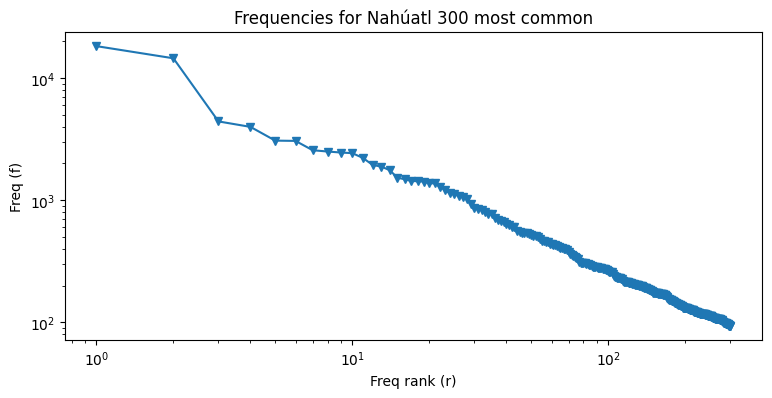

In [57]:
most_common_count = 300
nahuatl_freqs = get_frequencies(nahuatl_vocabulary, most_common_count)
plot_frequencies(nahuatl_freqs, f"Frequencies for Nahúatl {most_common_count} most common", log_scale=True)

In [59]:
nahuatl_freqs = get_frequencies(nahuatl_norm_vocabulary, len(nahuatl_norm_vocabulary))
na_freqs = np.array(nahuatl_freqs)
na_ranks = np.array(range(1, len(na_freqs)+1))
alpha_na = calculate_alpha(ranks=na_ranks, frecs=na_freqs)

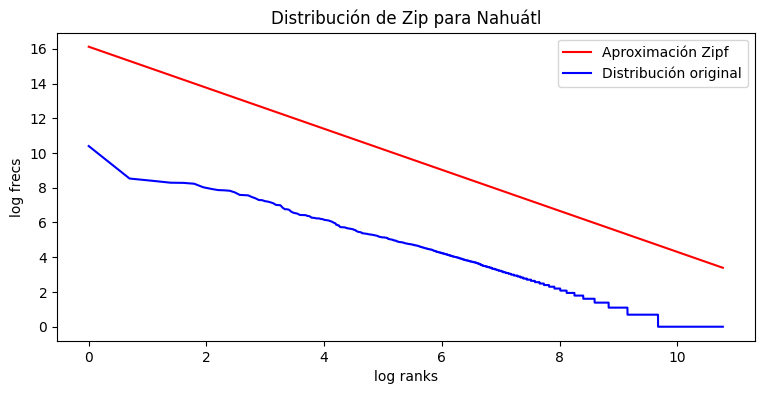

In [60]:
plot_generate_zipf(alpha_na, ranks=na_ranks, freqs=na_freqs)
plt.plot(np.log(na_ranks), np.log(na_freqs), color='b', label='Distribución original')
plt.xlabel('log ranks')
plt.ylabel('log frecs')
plt.title("Distribución de Zip para Nahuátl")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

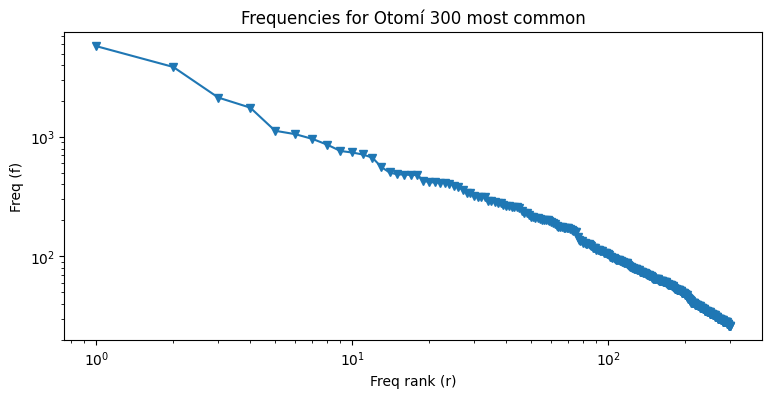

In [61]:
otomi_freqs = get_frequencies(otomi_vocabulary, most_common_count)
plot_frequencies(otomi_freqs, f"Frequencies for Otomí {most_common_count} most common", log_scale=True)

In [62]:
otomi_freqs = get_frequencies(otomi_vocabulary, len(otomi_vocabulary))
oto_freqs = np.array(otomi_freqs)
oto_ranks = np.array(range(1, len(oto_freqs)+1))
alpha_oto = calculate_alpha(ranks=oto_ranks, frecs=oto_freqs)

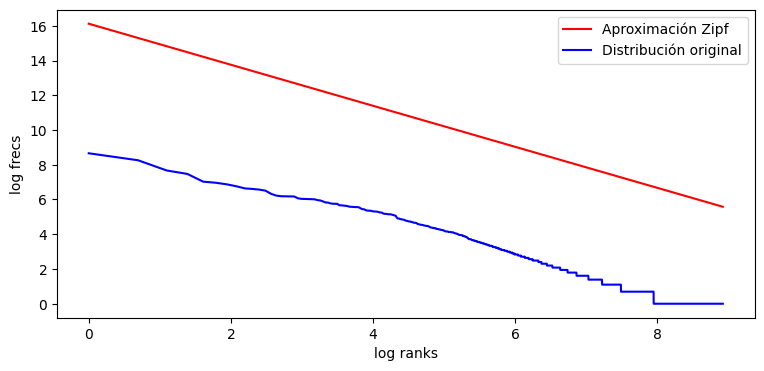

In [63]:
plot_generate_zipf(alpha_oto, ranks=oto_ranks, freqs=oto_freqs)
plt.plot(np.log(oto_ranks), np.log(oto_freqs), color='b', label='Distribución original')
plt.xlabel('log ranks')
plt.ylabel('log frecs')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

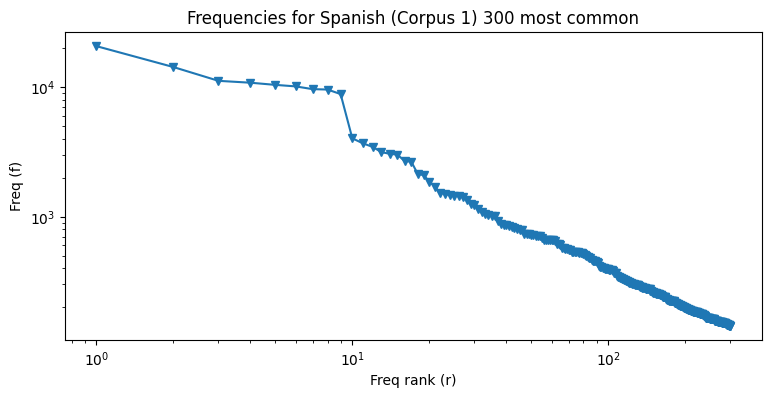

In [64]:
spanish_freqs = get_frequencies(nahuatl_es_vocabulary, most_common_count)
plot_frequencies(spanish_freqs, f"Frequencies for Spanish (Corpus 1) {most_common_count} most common", log_scale=True)

### Práctica 3: Stop! stop! 🚏 My Zipf's distribution can talk!!! 🙀

**Fecha de entrega: Domingo 17 de Marzo 2024 - 11:59pm**


- Comprobar si las *stopwords* que encontramos en paqueterias de *NLP* coinciden con las palabras más comúnes obtenidas en Zipf
    - Utilizar el [corpus CREA](https://corpus.rae.es/frec/CREA_total.zip)
    - Realizar una nube de palabras usando las stopwords de paqueteria y las obtenidas através de Zipf
    - Responder las siguientes preguntas:
        - ¿Obtenemos el mismo resultado? Si o no y ¿Porqué?
- Comprobar si Zipf se cumple para un lenguaje artificial creado por ustedes
  - Deberán darle un nombre a su lenguaje
  - Mostrar una oración de ejemplo
  - Pueden ser una secuencia de caracteres aleatorios
  - Tambien pueden definir el tamaño de las palabras de forma aleatoria